# 1. Install Dependencies and Setup

In [ ]:
%pip install tensorflow opencv-python matplotlib

In [ ]:
%pip list

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [6]:
import cv2
import imghdr

C:\Users\syfur.shohag\AppData\Local\Temp\ipykernel_6084\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir = 'data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

# 3. Load Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

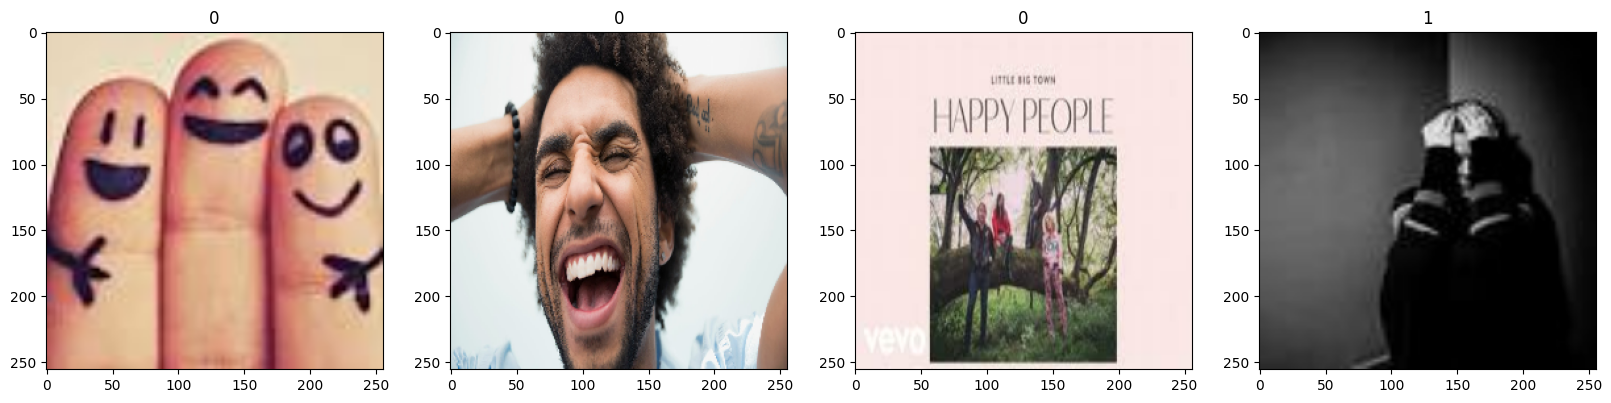

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[0.19607843, 0.19607843, 0.20392157],
          [0.19607843, 0.19607843, 0.20392157],
          [0.19607843, 0.19607843, 0.20392157],
          ...,
          [0.20055147, 0.18992034, 0.18431373],
          [0.20683211, 0.18532476, 0.19013481],
          [0.20784314, 0.18431373, 0.19215687]],
 
         [[0.19607843, 0.19607843, 0.20392157],
          [0.19607843, 0.19607843, 0.20392157],
          [0.19607843, 0.19607843, 0.20392157],
          ...,
          [0.20055147, 0.18992034, 0.18431373],
          [0.20683211, 0.18532476, 0.19013481],
          [0.20784314, 0.18431373, 0.19215687]],
 
         [[0.19607843, 0.19607843, 0.20392157],
          [0.19607843, 0.19607843, 0.20392157],
          [0.19607843, 0.19607843, 0.20392157],
          ...,
          [0.20055147, 0.18992034, 0.18431373],
          [0.20642282, 0.18573405, 0.19013481],
          [0.20729166, 0.18486519, 0.19215687]],
 
         ...,
 
         [[0.38878676, 0.6240809 , 0.03752777],
          [0.38864

# 5. Split Data

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train_size

7

In [19]:
val_size

2

In [20]:
test_size

1

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [22]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

In [25]:
from keras import backend 

In [26]:

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\syfur.shohag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 283ms/step - accuracy: 0.4973 - loss: 1.3636 - val_accuracy: 0.4844 - val_loss: 0.6826
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 323ms/step - accuracy: 0.5232 - loss: 0.6918 - val_accuracy: 0.5625 - val_loss: 0.6588
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 326ms/step - accuracy: 0.5196 - loss: 0.6858 - val_accuracy: 0.7031 - val_loss: 0.6329
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 315ms/step - accuracy: 0.5688 - loss: 0.6563 - val_accuracy: 0.6875 - val_loss: 0.6155
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 306ms/step - accuracy: 0.7252 - loss: 0.6146 - val_accuracy: 0.7500 - val_loss: 0.4939
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 322ms/step - accuracy: 0.7178 - loss: 0.5630 - val_accuracy: 0.8594 - val_loss: 0.4880
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 330ms/step - accuracy: 0.7828 - loss: 0.5123 - val_accuracy: 0.8438 - val_loss: 0.4678
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 327ms/step - accuracy: 0.7974 - loss: 0.4477 - val_accuracy: 0.7344 - val_loss:

In [32]:
hist.history['accuracy']

[0.5044642686843872,
 0.5267857313156128,
 0.5714285969734192,
 0.59375,
 0.7142857313156128,
 0.7232142686843872,
 0.7946428656578064,
 0.8080357313156128,
 0.7455357313156128,
 0.8482142686843872]

In [33]:
np.mean(hist.history['accuracy'])

0.6830357193946839

In [34]:
np.mean(hist.history['val_accuracy'])

0.7265625

# 8. Plot Performance

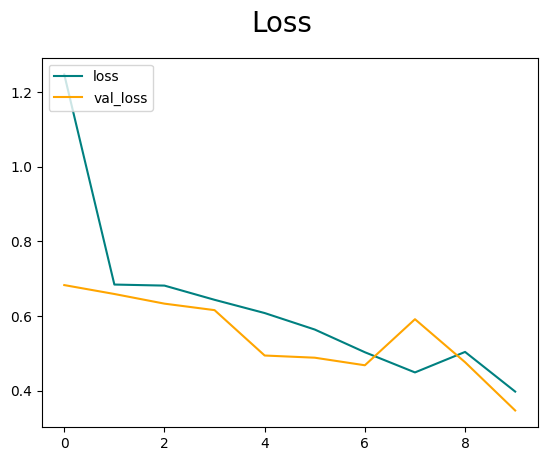

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

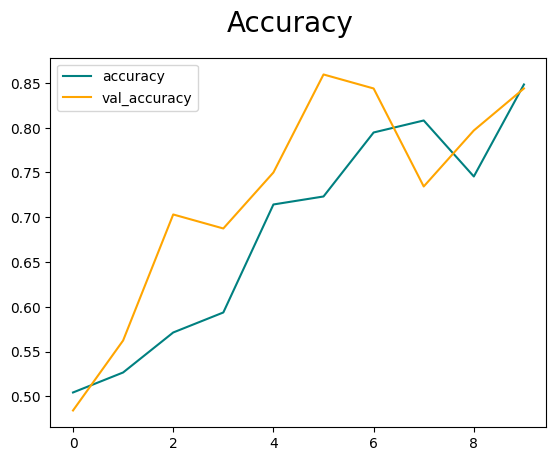

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [39]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


In [34]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.95970696, shape=(), dtype=float32) tf.Tensor(0.95272726, shape=(), dtype=float32) tf.Tensor(0.9389313, shape=(), dtype=float32)


# 10. Test

In [40]:
import cv2

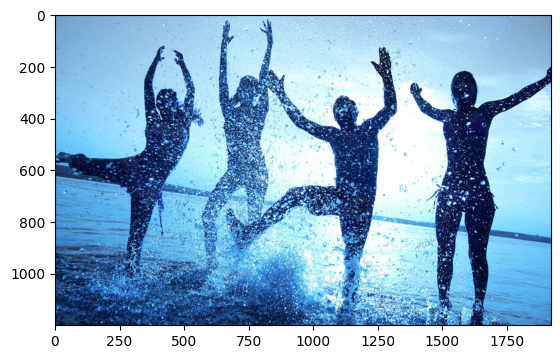

In [41]:
img = cv2.imread('data/happy/1902539.jpg')
plt.imshow(img)
plt.show()

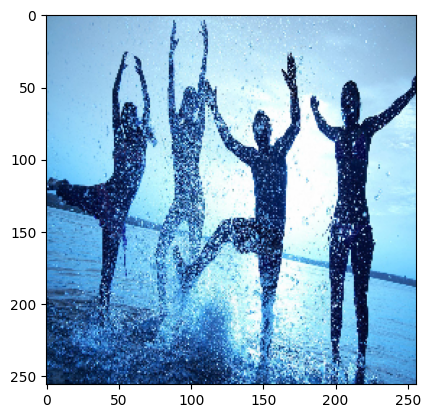

In [42]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [43]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [44]:
yhat

array([[0.2917064]], dtype=float32)

In [46]:
if yhat > 0.5: 
    print(f'Happy')
else:
    print(f'Sad')

Sad


# 11. Save the Model

In [47]:
from tensorflow.keras.models import load_model

In [48]:
model.save(os.path.join('models','cnn.keras'))

In [49]:
new_model = load_model('models/cnn.keras')

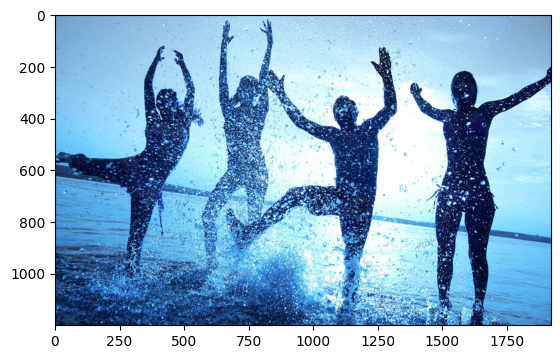

In [50]:
img = cv2.imread('data/happy/1902539.jpg')
plt.imshow(img)
plt.show()

In [51]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))
yhat

if yhat > 0.5: 
    print(f'Happy')
else:
    print(f'Sad')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Sad
